# Data Frame Description

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [3]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 


# Preprocessing Column Names

In [4]:
from string import digits

#Removing tab spaces
df.columns= df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns= df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [5]:
df.columns

Index(['Gender of respondent', 'How old are you?',
       'Which city do you shop online from?',
       'What is the Pin Code of where you shop online from?',
       'Since How Long You are Shopping Online ?',
       'How many times you have made an online purchase in the past  year?',
       'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',
       'What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without mak

In [6]:
df.shape

(269, 71)

Observation:Dataset have 269 rows and 71 columns

In [7]:
df.dtypes

Gender of respondent                                                    object
How old are you?                                                        object
Which city do you shop online from?                                     object
What is the Pin Code of where you shop online from?                      int64
Since How Long You are Shopping Online ?                                object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

All the columns are of object datatype except for pincode column which is of int type

# Checking null values in the dataframe

In [8]:
df.isnull().sum()

Gender of respondent                                                    0
How old are you?                                                        0
Which city do you shop online from?                                     0
What is the Pin Code of where you shop online from?                     0
Since How Long You are Shopping Online ?                                0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [9]:
#%age data missing
for i in df.columns:
    print('% data missing in',i,'is:',(df[i].isnull().sum()/df.shape[0])*100)

% data missing in Gender of respondent is: 0.0
% data missing in How old are you? is: 0.0
% data missing in Which city do you shop online from? is: 0.0
% data missing in What is the Pin Code of where you shop online from? is: 0.0
% data missing in Since How Long You are Shopping Online ? is: 0.0
% data missing in How many times you have made an online purchase in the past  year? is: 0.0
% data missing in How do you access the internet while shopping on-line? is: 0.0
% data missing in Which device do you use to access the online shopping? is: 0.0
% data missing in What is the screen size of your mobile device? is: 0.0
% data missing in What is the operating system (OS) of your device? is: 0.0
% data missing in What browser do you run on your device to access the website? is: 0.0
% data missing in Which channel did you follow to arrive at your favorite online store for the first time? is: 0.0
% data missing in After first visit, how do you reach the online retail store? is: 0.0
% data mi

# Exploratory Data Analysis:

# Univariate Analysis:

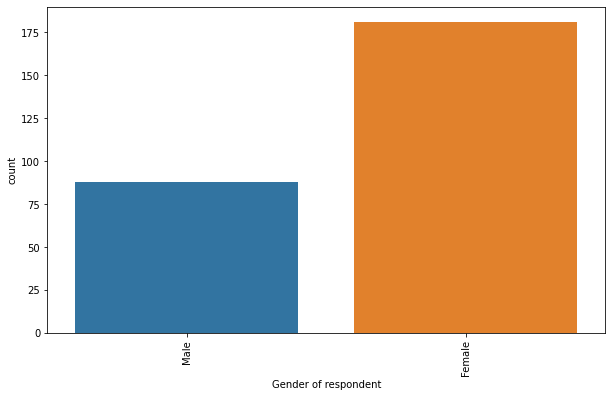

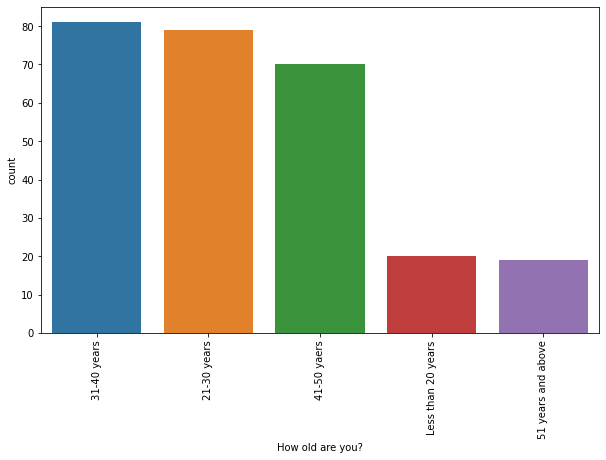

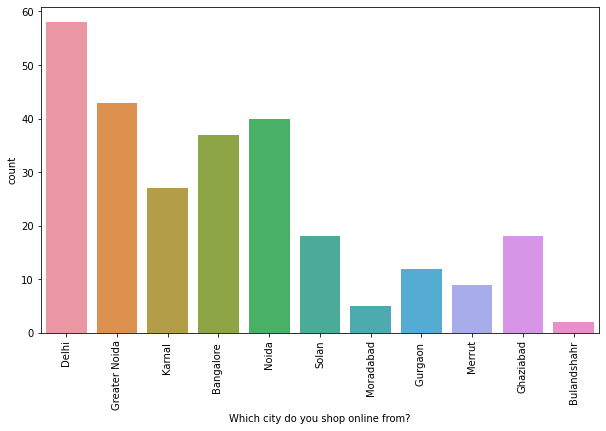

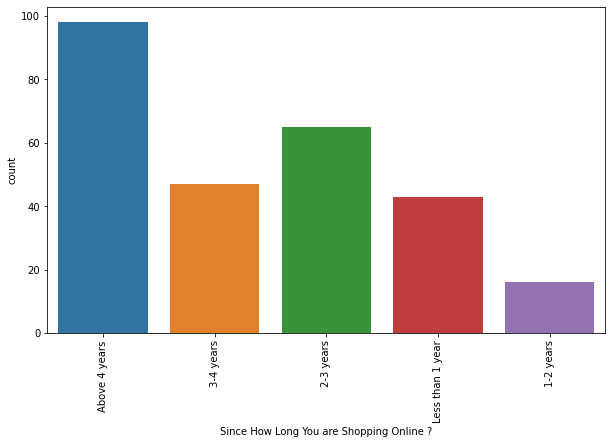

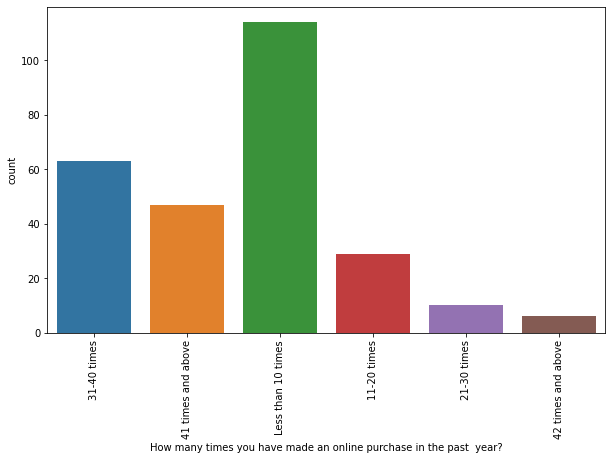

In [10]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

In [11]:
#Resolving ambiguity of column 
df['How many times you have made an online purchase in the past  year?'].replace('42 times and above','41 times and above',inplace=True)
df['Which city do you shop online from?'].replace('Greater Noida','Noida',inplace=True)

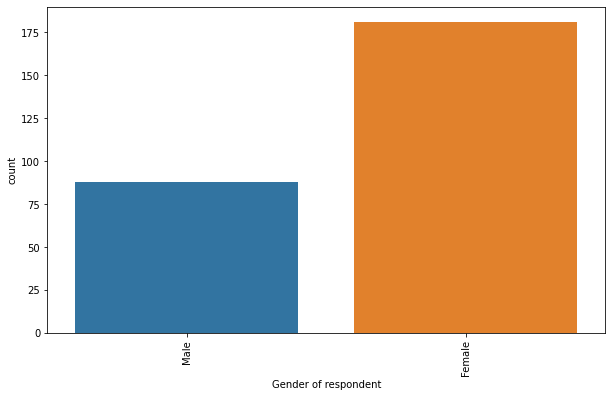

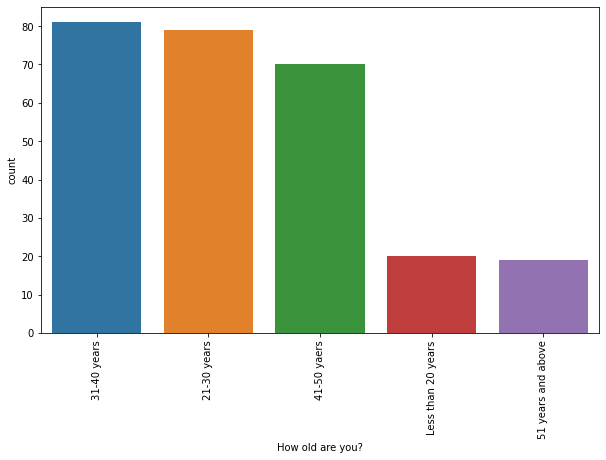

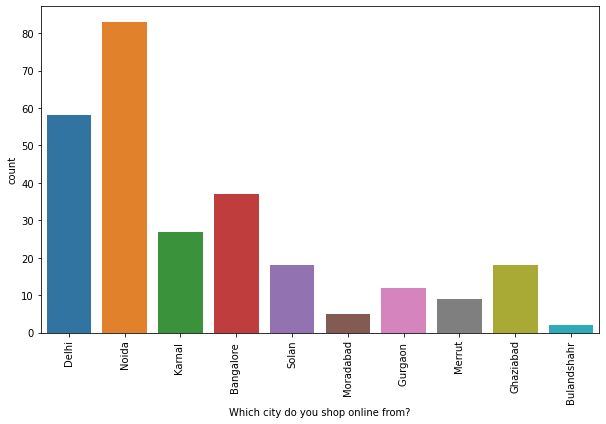

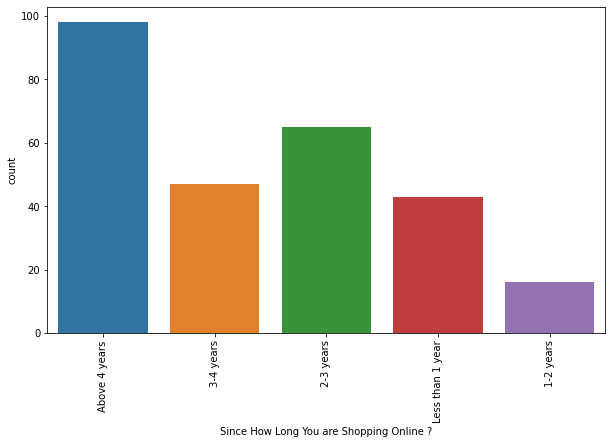

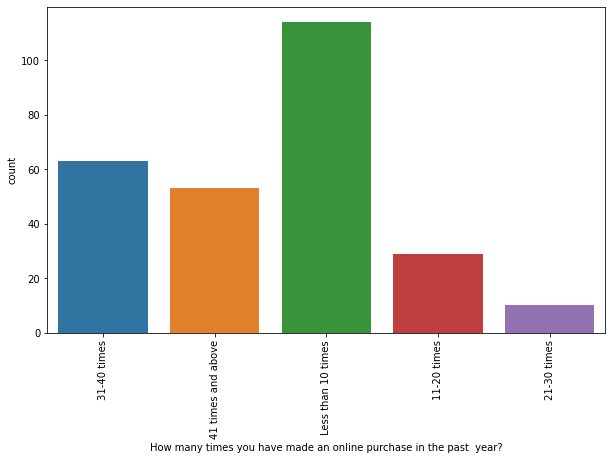

In [12]:
personal_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']
for i in personal_info:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(10,6))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Key Observation:

-There is double the number of women than men who have taken this survey. 

-Most of the people are in their 30's followed by 20's, teenagers and senior citizen are the least in number.

-Most of the people belong from noida,delhi and banglore.

-Most of the people shopping online have been shopping from a long time.

-Majority of people shop online 10 times a year.

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

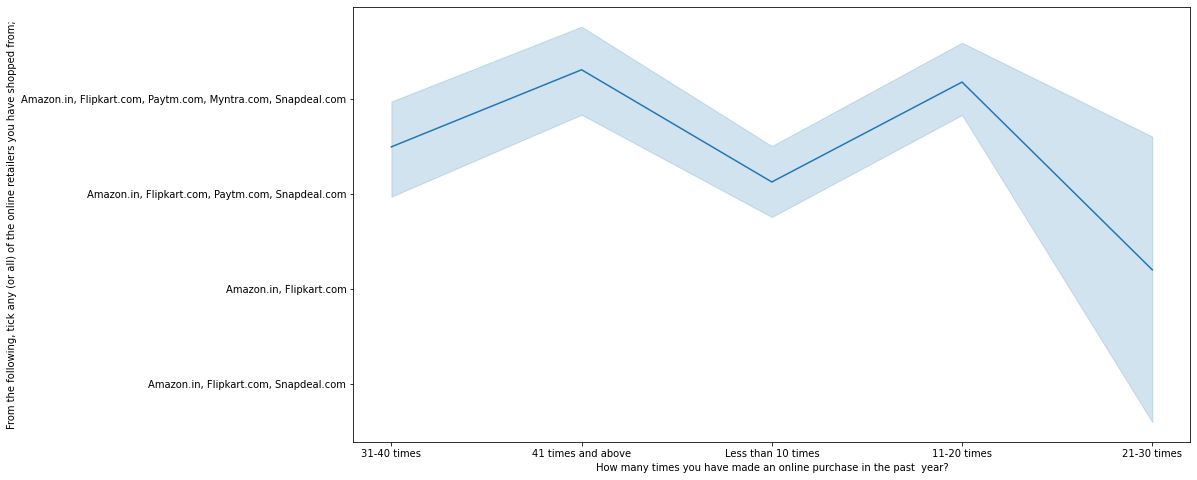

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

Heavy shoppers who shop more than 41 times a year shop from all the online brands, some of the people who shop for 31-40 and less than 10 times a year seem to exclude myntra. People shop from Amazon and flipkart whatever be the case.

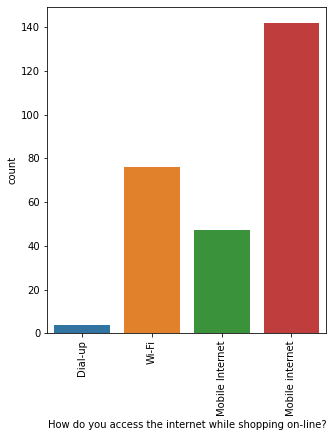

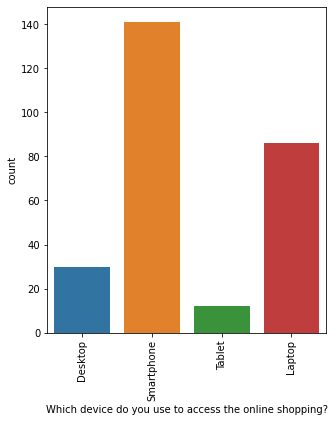

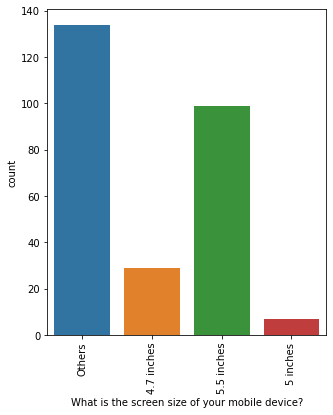

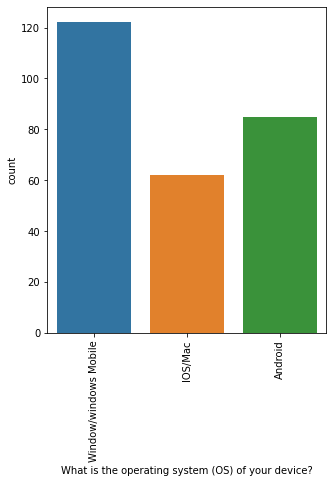

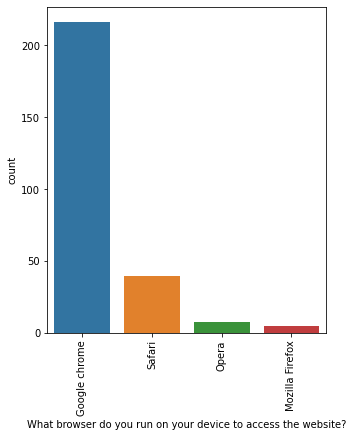

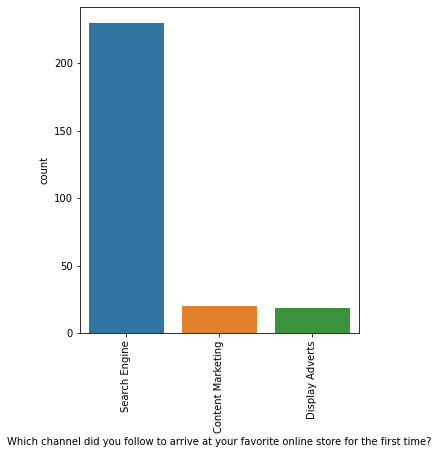

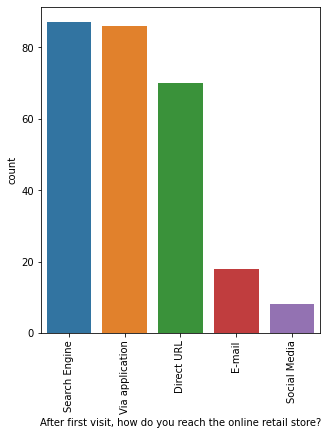

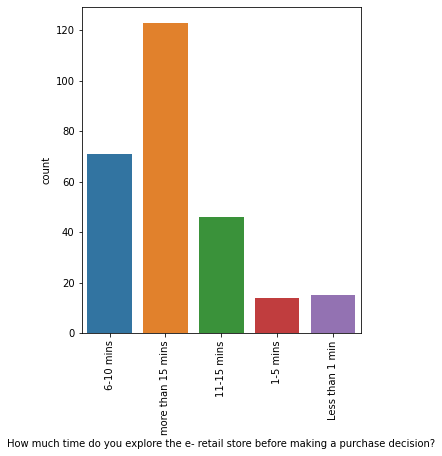

In [14]:
device_info=[ 'How do you access the internet while shopping on-line?',
       'Which device do you use to access the online shopping?',
       'What is the screen size of your mobile device?',
       'What is the operating system (OS) of your device?',
       'What browser do you run on your device to access the website?',
       'Which channel did you follow to arrive at your favorite online store for the first time?',
       'After first visit, how do you reach the online retail store?',
       'How much time do you explore the e- retail store before making a purchase decision?',]

for i in device_info:
        plt.figure(figsize=(5,6))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Observation

-Customers perfer mobile internet and smart phone for online shopping.

-Customers have voted for windows as their os followed by android.

-Most shopping is done chrome browser.

-Customers tend to explore more than 15 times in e-retail store before making purchase decision.

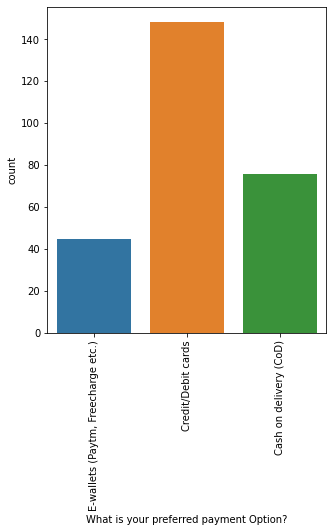

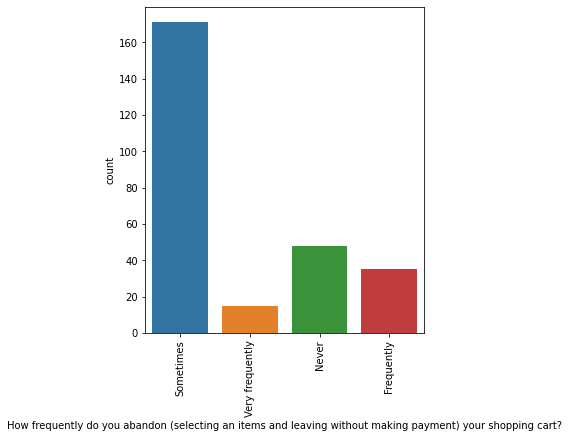

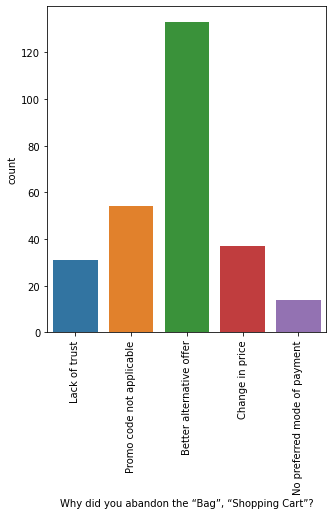

In [15]:
payment=['What is your preferred payment Option?',
       'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
       'Why did you abandon the “Bag”, “Shopping Cart”?']
for i in payment:
        plt.figure(figsize=(5,6))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Observation: 

-Most preferred payment methos is creditcards/debitcards.

-customer sometimes abandon items on shopping cart (selecting an items and leaving without making payment).

-customer abandons mainly because they found a better alternative offer.

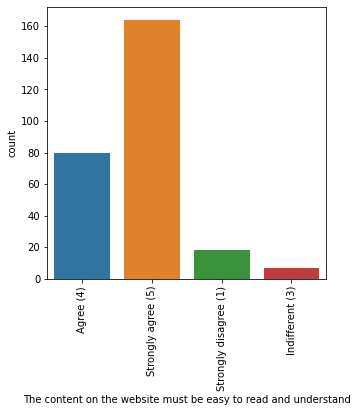

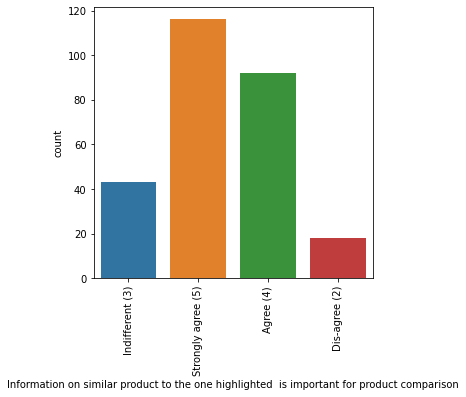

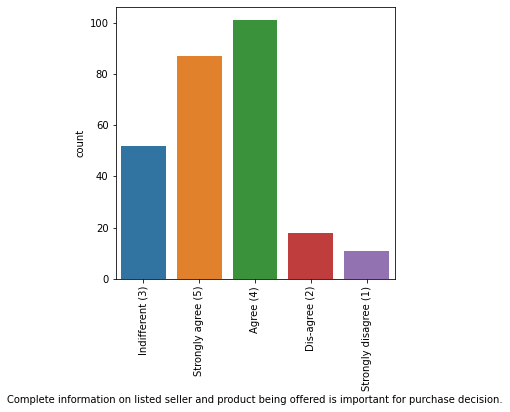

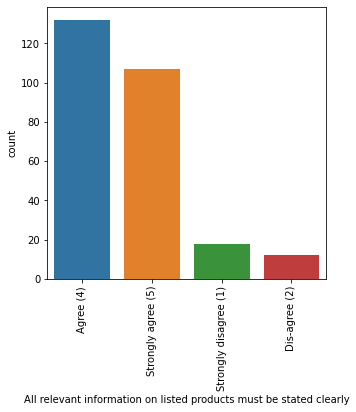

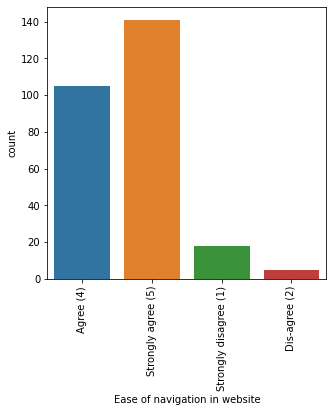

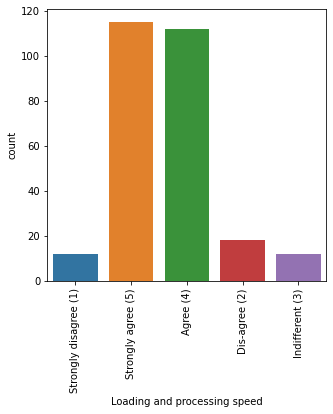

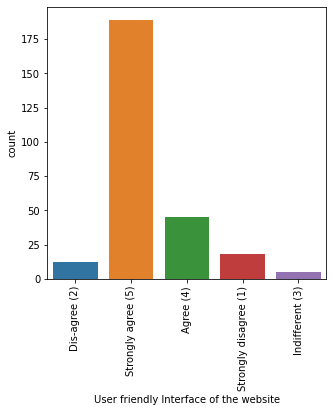

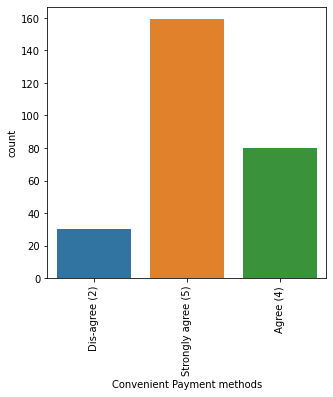

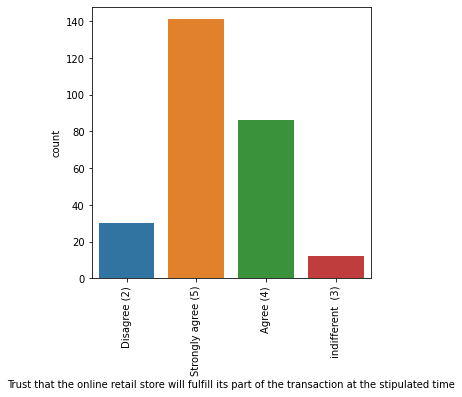

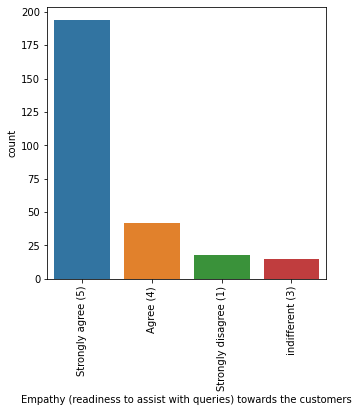

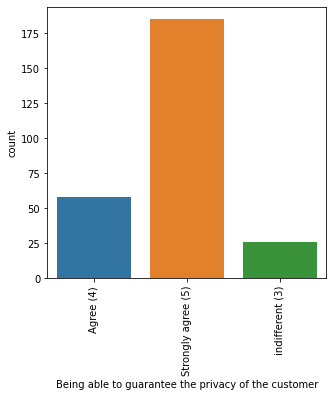

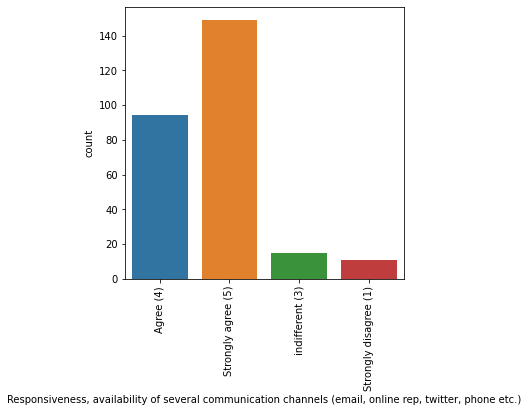

In [29]:
ease_of_shopping=['The content on the website must be easy to read and understand',
       'Information on similar product to the one highlighted  is important for product comparison',
       'Complete information on listed seller and product being offered is important for purchase decision.',
       'All relevant information on listed products must be stated clearly',
       'Ease of navigation in website', 'Loading and processing speed',
       'User friendly Interface of the website', 'Convenient Payment methods',
       'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       'Empathy (readiness to assist with queries) towards the customers',
       'Being able to guarantee the privacy of the customer',
       'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']

for i in ease_of_shopping:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Observation:
    
-customers strongly agree that the content on the website must be easy to read and understand

-customers strongly agree that the Information on similar product to the one highlighted  is important for product comparison

-customers agree that Complete information on listed seller and product being offered is important for purchase decision

-customers strongly agree that there should Ease of navigation in website

-customers strongly agree with Loading and processing speed as important factor for online shopping.

-customers strongly agree with User friendly Interface of the website & Convenient Payment methods

-customers strongly agree with Trust that the online retail store will fulfill its part of the transaction at the stipulated time

-customers strongly agree that there should be Empathy (readiness to assist with queries) towards the customers

-customers strongly agree with the platform Being able to guarantee the privacy of the customer

-customers strongly agree that there should be Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.

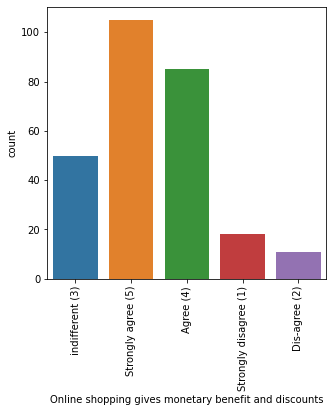

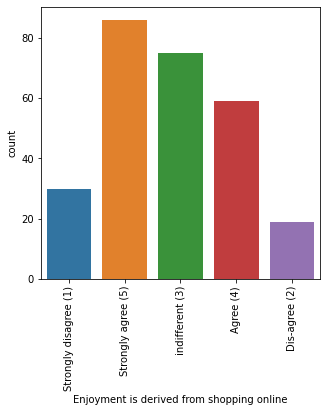

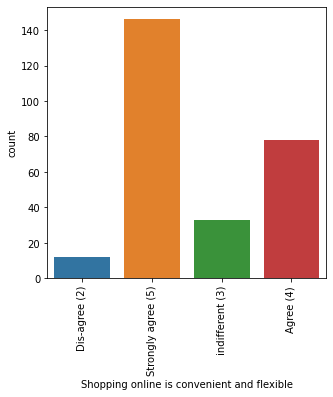

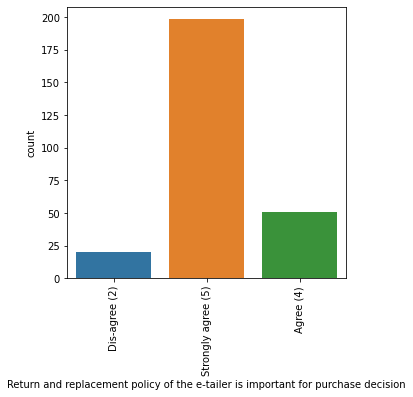

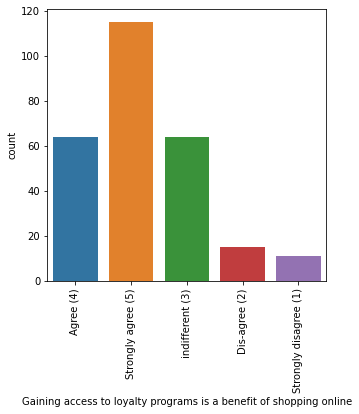

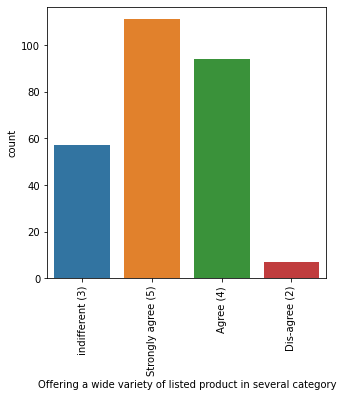

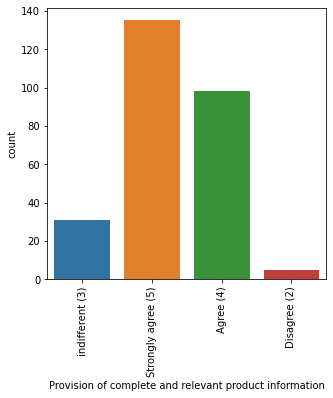

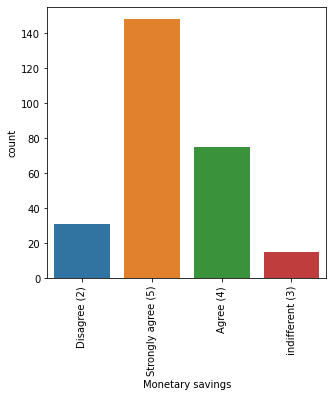

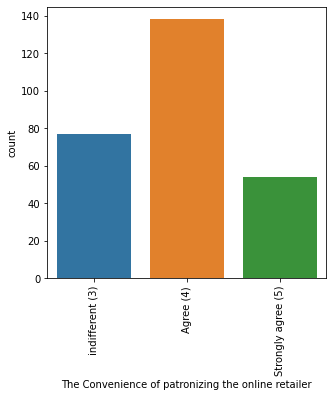

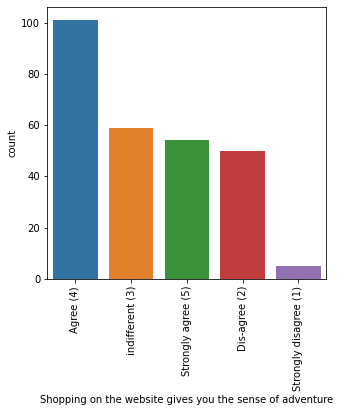

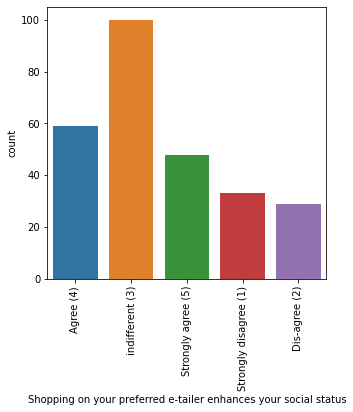

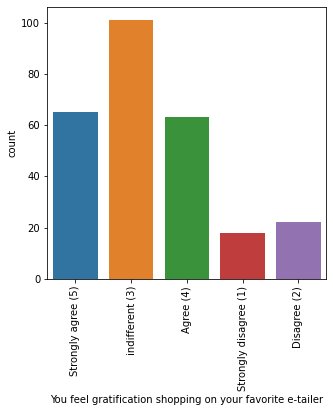

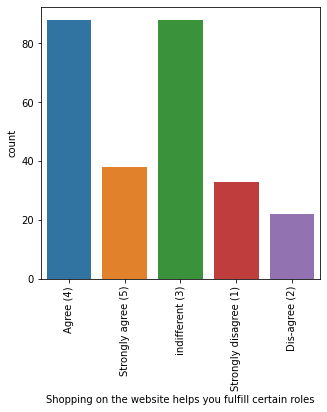

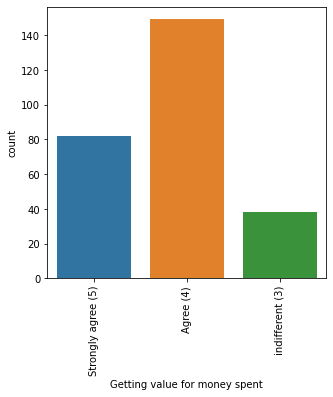

In [30]:
benifits_of_online_shopping=['Online shopping gives monetary benefit and discounts',
       'Enjoyment is derived from shopping online',
       'Shopping online is convenient and flexible',
       'Return and replacement policy of the e-tailer is important for purchase decision',
       'Gaining access to loyalty programs is a benefit of shopping online',
       'Offering a wide variety of listed product in several category',
       'Provision of complete and relevant product information',
       'Monetary savings','The Convenience of patronizing the online retailer',
       'Shopping on the website gives you the sense of adventure',
       'Shopping on your preferred e-tailer enhances your social status',
       'You feel gratification shopping on your favorite e-tailer',
       'Shopping on the website helps you fulfill certain roles',
       'Getting value for money spent',]

for i in benifits_of_online_shopping:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Observation:

-Customers strongly agress that Online shopping gives monetary benefit and discounts

-Customers strongly agress that Enjoyment is derived from shopping online

-Customers strongly agress that Shopping online is convenient and flexible

-Customers strongly agress that Return and replacement policy of the e-tailer is important for purchase decision

-Customers strongly agress that Gaining access to loyalty programs is a benefit of shopping online

-Customers strongly agress that online shopping Offer a wide variety of listed product in several category

-Customers strongly agress that online shopping has Provision of complete and relevant product information

-Customers strongly agress that online shopping gives Monetary savings'

-Customers agress that Shopping on the website gives you the sense of adventure

-customer voted for indifferent that Shopping on your preferred e-tailer enhances your social status

-customer voted for indifferent You feel gratification shopping on your favorite e-tailer

-Scustomer voted for indifferent and agree on hopping on the website helps you fulfill certain roles

-Customers agress that Shopping online helps in Getting value for money spent

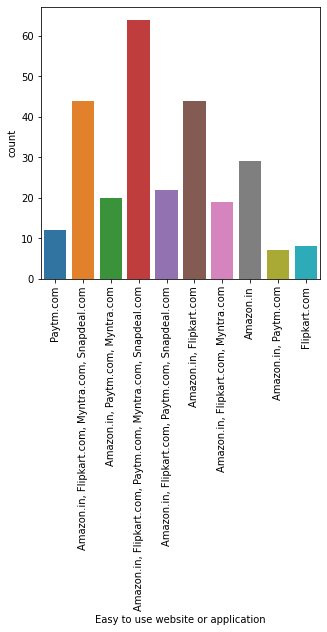

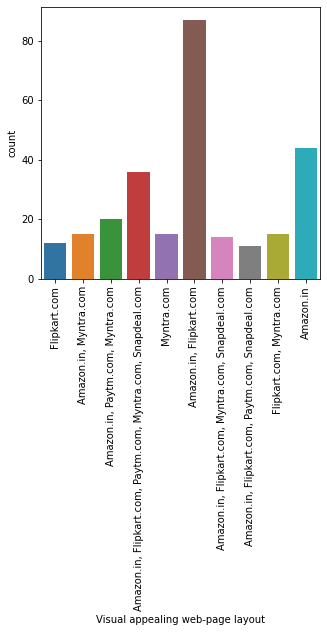

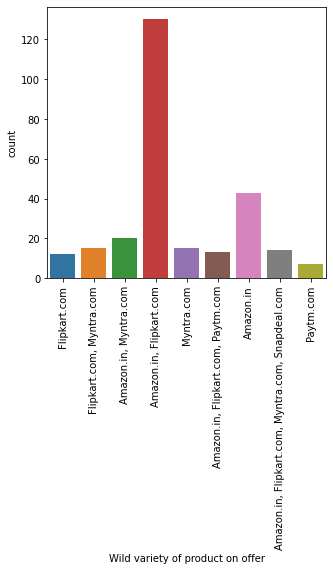

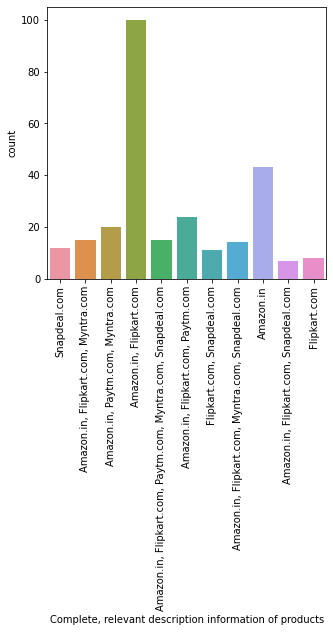

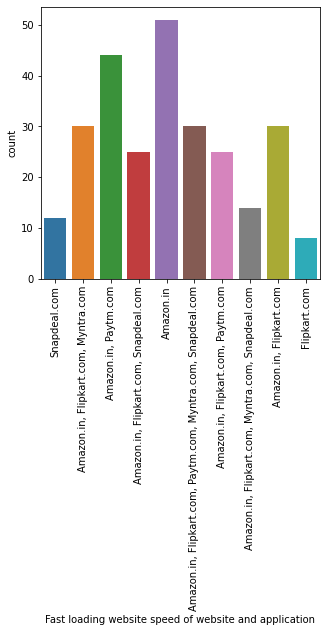

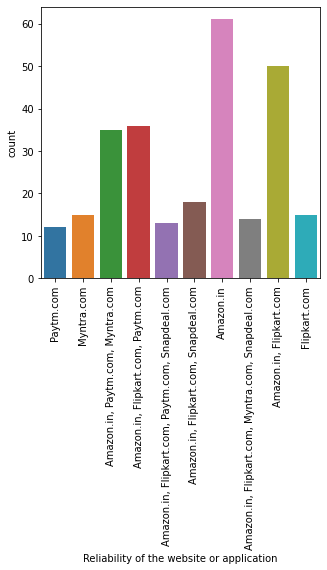

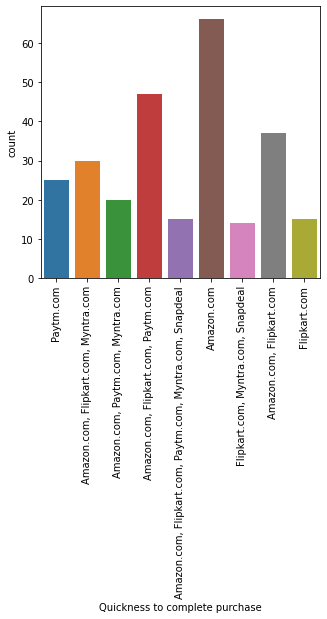

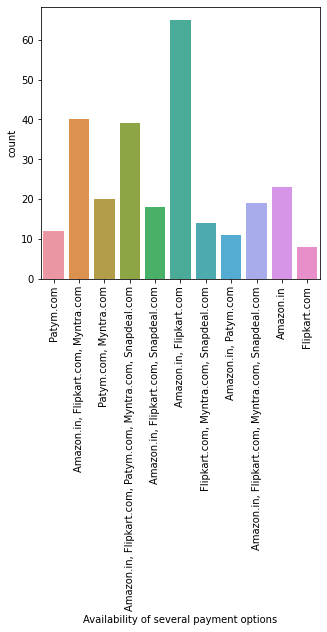

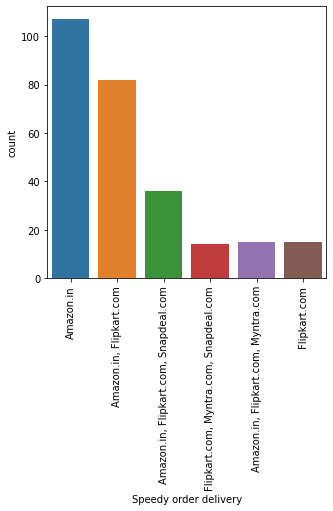

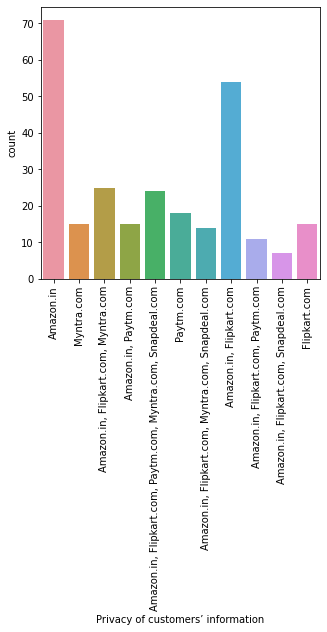

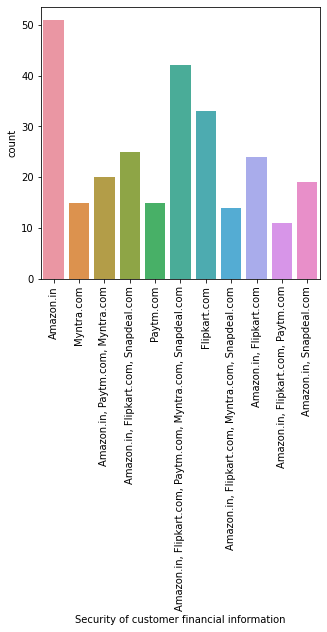

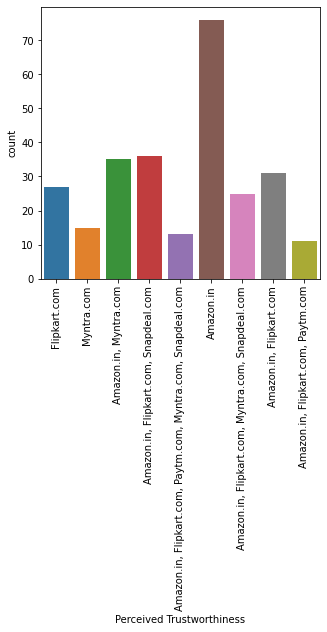

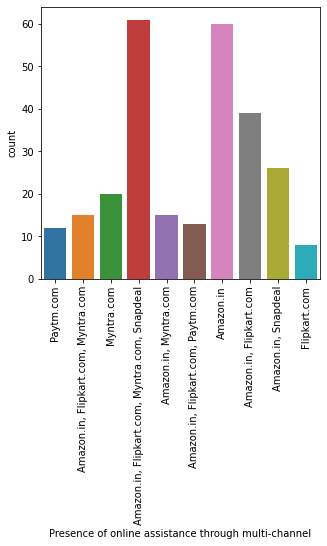

In [36]:
positive=[
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 'Speedy order delivery',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

for i in positive:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 


observation:
    
-Amazon,flipkart,myntra,paytm,snapdeal was most voted the easy to use website or application

-amazon and flipkart was most voted better Visual appealing web-page layout

-amazon and flipkart was most voted for offers Wild variety of product on offer

-amazon and flipkart was most voted for Complete, relevant description information of products

-amazon was most voted for Fast loading website speed of website and application

-amazon was most voted for the Reliability of the website or application

-amazon was most voted for Quickner to complete purchase

-amazon and flipkart was most voted for Availability of several payment options

-amazon was most voted for provides Speedy order delivery

-amazon was most voted for Privacy of customers’ information

-amazon was most voted for Security of customer financial information

-amazon was most voted for Perceived Trustworthiness

-amazon,flipkart,myntra and snapdeal was most voted for Presence of online assistance through multi-channel'

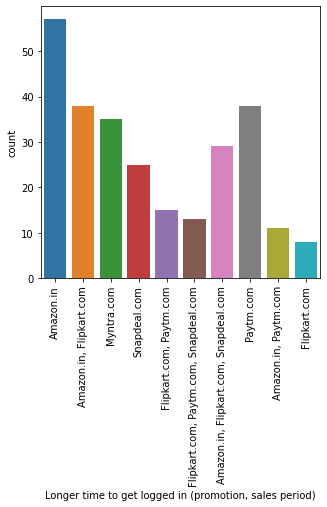

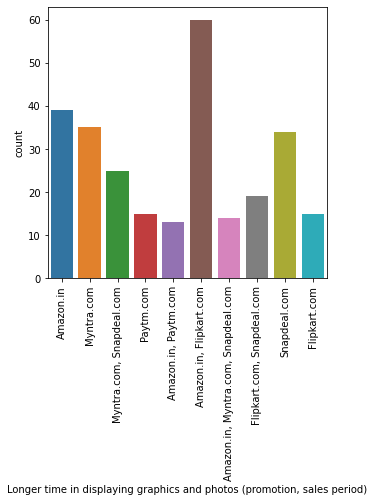

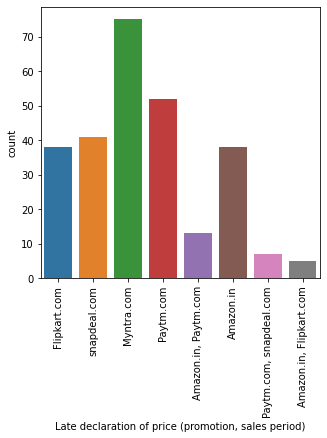

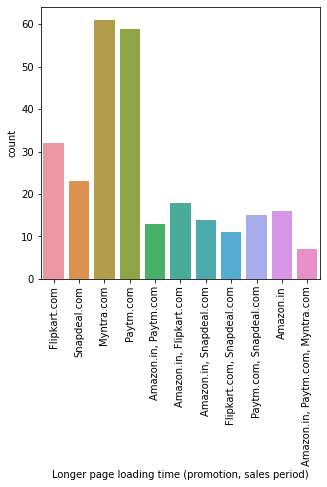

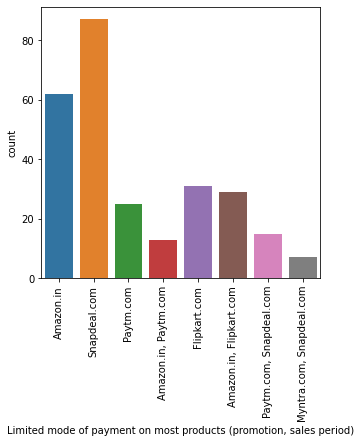

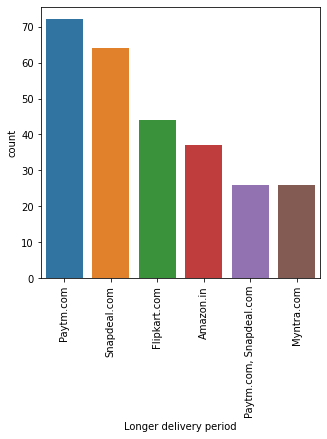

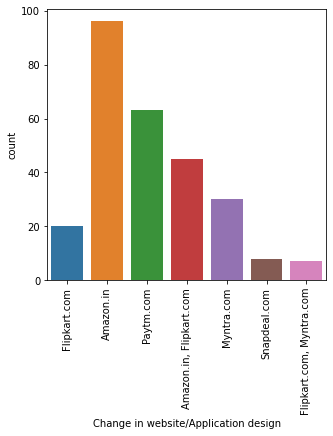

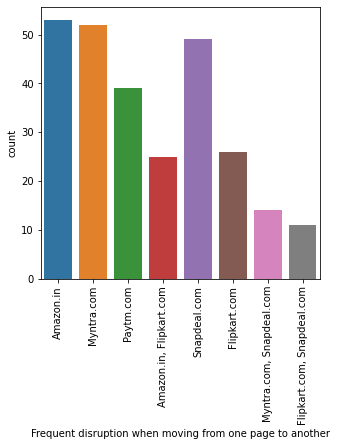

In [37]:
negative=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']
for i in negative:
        plt.figure(figsize=(5,5))
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=df)
        plt.show() 

Observation:
    
-Amazon was most voted for Longer time to get logged in (promotion, sales period)

-Amazon and flipkart was most voted for Longer time in displaying graphics and photos (promotion, sales period)

-Myntra was most voted for Late declaration of price (promotion, sales period)

-Myntra and paytm was most voted for Longer page loading time (promotion, sales period)

-Snapdeal was most voted for Limited mode of payment on most products (promotion, sales period)

-Paytm was most voted for Longer delivery period and least was voted for myntra.

-Amazon and myntra was most voted for Frequent disruption when moving from one page to another

<Figure size 432x288 with 0 Axes>

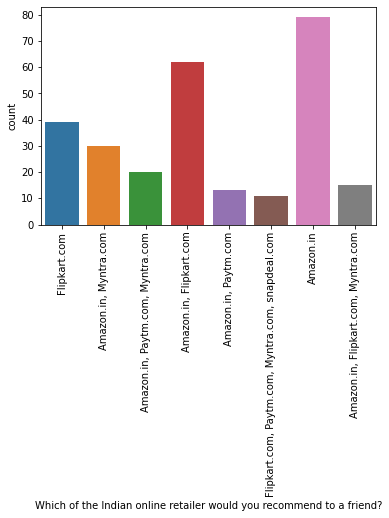

<Figure size 432x288 with 0 Axes>

In [28]:
sns.countplot(x=df['Which of the Indian online retailer would you recommend to a friend?'])
plt.xticks(rotation=90)
plt.figure()

Observation:

Customers seem to be more loyal to amazon, flipkart and they would recommend these platforms to their friend

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='count'>

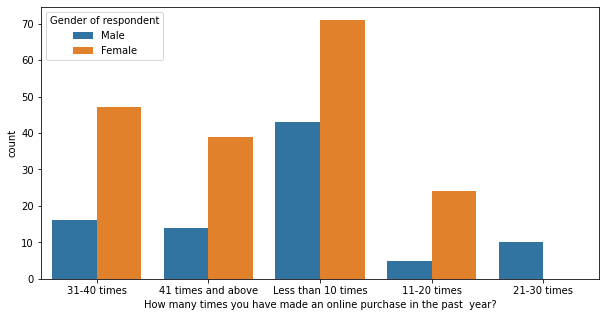

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='How many times you have made an online purchase in the past  year?',hue='Gender of respondent',data=df)

Female customer tends to make online purchase more than female.

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='count'>

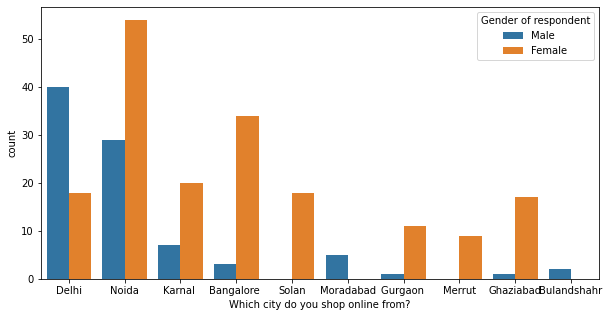

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='Which city do you shop online from?',hue='Gender of respondent',data=df)

Observation:
    
Delhi,Moradabad and buldanshahr are the region where male makes online shopping more than female.